In [133]:
from pyslise import SturmLiouville
from math import exp
import numpy as np

# https://doi.org/10.17512/jamcm.2016.2.14
alpha = 1/4
p = lambda x: (1+x)**2
q = lambda x: x**2 - 2
w = lambda x: exp(x)
a = 0
b = 1
N = 30

slp = SturmLiouville(p, q, w, a, b, tolerance=1e-15)
exact = np.array(list(zip(*slp.eigenvaluesByIndex(0, N, (0, 1), (0, 1))))[1])
exact

array([   12.10924224,    50.86543389,   115.47305164,   205.92589556,
         322.22302568,   464.36420073,   632.34933675,   826.17839841,
        1045.85136873,  1291.36823874,  1562.72900336,  1859.93365952,
        2182.98220526,  2531.87463933,  2906.61096085,  3307.19116923,
        3733.61526403,  4185.88324494,  4663.99511172,  5167.95086419,
        5697.75050223,  6253.39402571,  6834.88143457,  7442.21272873,
        8075.38790814,  8734.40697275,  9419.26992254, 10129.97675747,
       10866.52747751, 11628.92208266])

In [136]:
def solve(n):
    xs = np.linspace(a, b, n+1)
    ps = np.vectorize(p)(np.linspace(a, b, 2*n+1)[1::2])
    qs = np.vectorize(q)(xs[1:-1])
    ws = np.vectorize(w)(xs[1:-1])
    dx = 1/n

    # ps = np.array(range(0, n))

    D = np.zeros((n-1,n-1))
    np.fill_diagonal(D, -ps[1:] - ps[:-1])
    np.fill_diagonal(D[:-1,1:], ps[1:-1])
    np.fill_diagonal(D[1:,:-1], ps[1:-1])
    D /= dx*dx

    V = np.diag(ws**-1) @ (-D + np.diag(qs))
    found = np.array(sorted(np.linalg.eigvals(V))[:N])
    return found

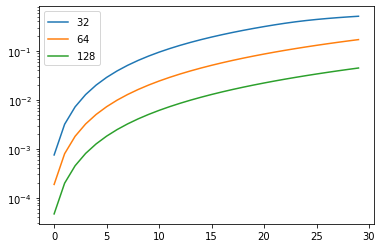

In [138]:
import matplotlib.pyplot as plt

plt.semilogy()

for n in [32, 64, 128]:
    found = solve(n)
    plt.plot(range(0, N), np.abs(exact - found)/exact, label=f"${n}$")
plt.legend()